In [46]:
#Read Cleaned Sensor Data File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
sensor_data = pd.read_csv('SensorData.csv')
print(sensor_data.shape)
sensor_data.head()

(479, 3)


,sensor_name,DateTime,SensorData_Cleanse
0,location,04/13/2024 21:05:44.000000,longitude=-104.9946196 latitude=39.7124401 bri
1,light,04/13/2024 21:05:41.000000,lux=20.294906616210938
2,light,04/13/2024 21:06:09.000000,lux=9268.046875
3,light,04/13/2024 21:05:21.000000,lux=48.50655746459961
4,light,04/13/2024 21:05:45.000000,lux=19.947776794433594


In [48]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sensor_name         479 non-null    object
 1   DateTime            479 non-null    object
 2   SensorData_Cleanse  479 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


In [51]:
# Initialize empty lists for each column
longitude = []
latitude = []
lux = []
steps = []
brightness = []
sensor_name = []
DateTime = []

# Split SensorData_Cleanse by spaces to extract values
for index, row in sensor_data.iterrows():
    # Initialize variables to store values for current row
    curr_longitude = np.nan
    curr_latitude = np.nan
    curr_lux = np.nan
    curr_steps = np.nan
    curr_brightness = np.nan
    
    # Split SensorData_Cleanse by spaces
    items = row['SensorData_Cleanse'].split()
    
    # Extract values from items
    for item in items:
        # Check if the item contains the '=' character
        if '=' in item:
            key, value = item.split('=')
            if key == 'longitude':
                curr_longitude = value
            elif key == 'latitude':
                curr_latitude = value
            elif key == 'lux':
                curr_lux = value
            elif key == 'steps':
                curr_steps = value
            elif key == 'brightness':
                curr_brightness = value
    
    # Append values to lists
    sensor_name.append(row['sensor_name'])
    DateTime.append(row['DateTime'])
    longitude.append(curr_longitude)
    latitude.append(curr_latitude)
    lux.append(curr_lux)
    steps.append(curr_steps)
    brightness.append(curr_brightness)

# Create a new DataFrame from the lists
new_sensor_data = pd.DataFrame({
    'sensor_name': sensor_name,
    'DateTime': DateTime,
    'longitude': longitude,
    'latitude': latitude,
    'lux': lux,
    'steps': steps,
    'brightness': brightness
})


new_sensor_data.head()


,sensor_name,DateTime,longitude,latitude,lux,steps,brightness
0,location,2024-04-13 21:05:44,-104.9946196,39.7124401,NaN,NaN,NaN
1,light,2024-04-13 21:05:41,NaN,NaN,20.294906616210938,NaN,NaN
2,light,2024-04-13 21:06:09,NaN,NaN,9268.046875,NaN,NaN
3,light,2024-04-13 21:05:21,NaN,NaN,48.50655746459961,NaN,NaN
4,light,2024-04-13 21:05:45,NaN,NaN,19.947776794433594,NaN,NaN


In [55]:
#Changing the datatype to date
new_sensor_data['DateTime'] = pd.to_datetime(new_sensor_data['DateTime'])
new_sensor_data['longitude'] = np.float64(new_sensor_data['longitude'])
new_sensor_data['latitude'] = np.float64(new_sensor_data['latitude'])
new_sensor_data['lux'] = np.float64(new_sensor_data['lux'])
new_sensor_data['steps'] = np.float64(new_sensor_data['steps'])
new_sensor_data['brightness'] = np.float64(new_sensor_data['brightness'])

new_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sensor_name  479 non-null    object        
 1   DateTime     479 non-null    datetime64[ns]
 2   longitude    114 non-null    float64       
 3   latitude     112 non-null    float64       
 4   lux          251 non-null    float64       
 5   steps        36 non-null     float64       
 6   brightness   78 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 26.3+ KB


In [57]:
new_sensor_data.describe()

,DateTime,longitude,latitude,lux,steps,brightness
count,479,114.000000,112.000000,251.000000,36.000000,78.0
mean,2024-04-13 21:05:48.382045952,-104.994628,39.712423,903.009073,17.500000,2.5
min,2024-04-13 20:54:09,-104.994649,39.712000,9.225549,0.000000,2.5
25%,2024-04-13 21:05:28,-104.994636,39.712430,26.305657,8.750000,2.5
50%,2024-04-13 21:05:51,-104.994624,39.712439,47.366726,17.500000,2.5
75%,2024-04-13 21:06:11,-104.994619,39.712440,158.713280,26.250000,2.5
max,2024-04-13 21:06:27,-104.994580,39.712471,9876.225586,35.000000,2.5
std,NaN,0.000012,0.000072,2571.285902,10.535654,0.0


array([[<Axes: title={'center': 'DateTime'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'lux'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'brightness'}>]], dtype=object)

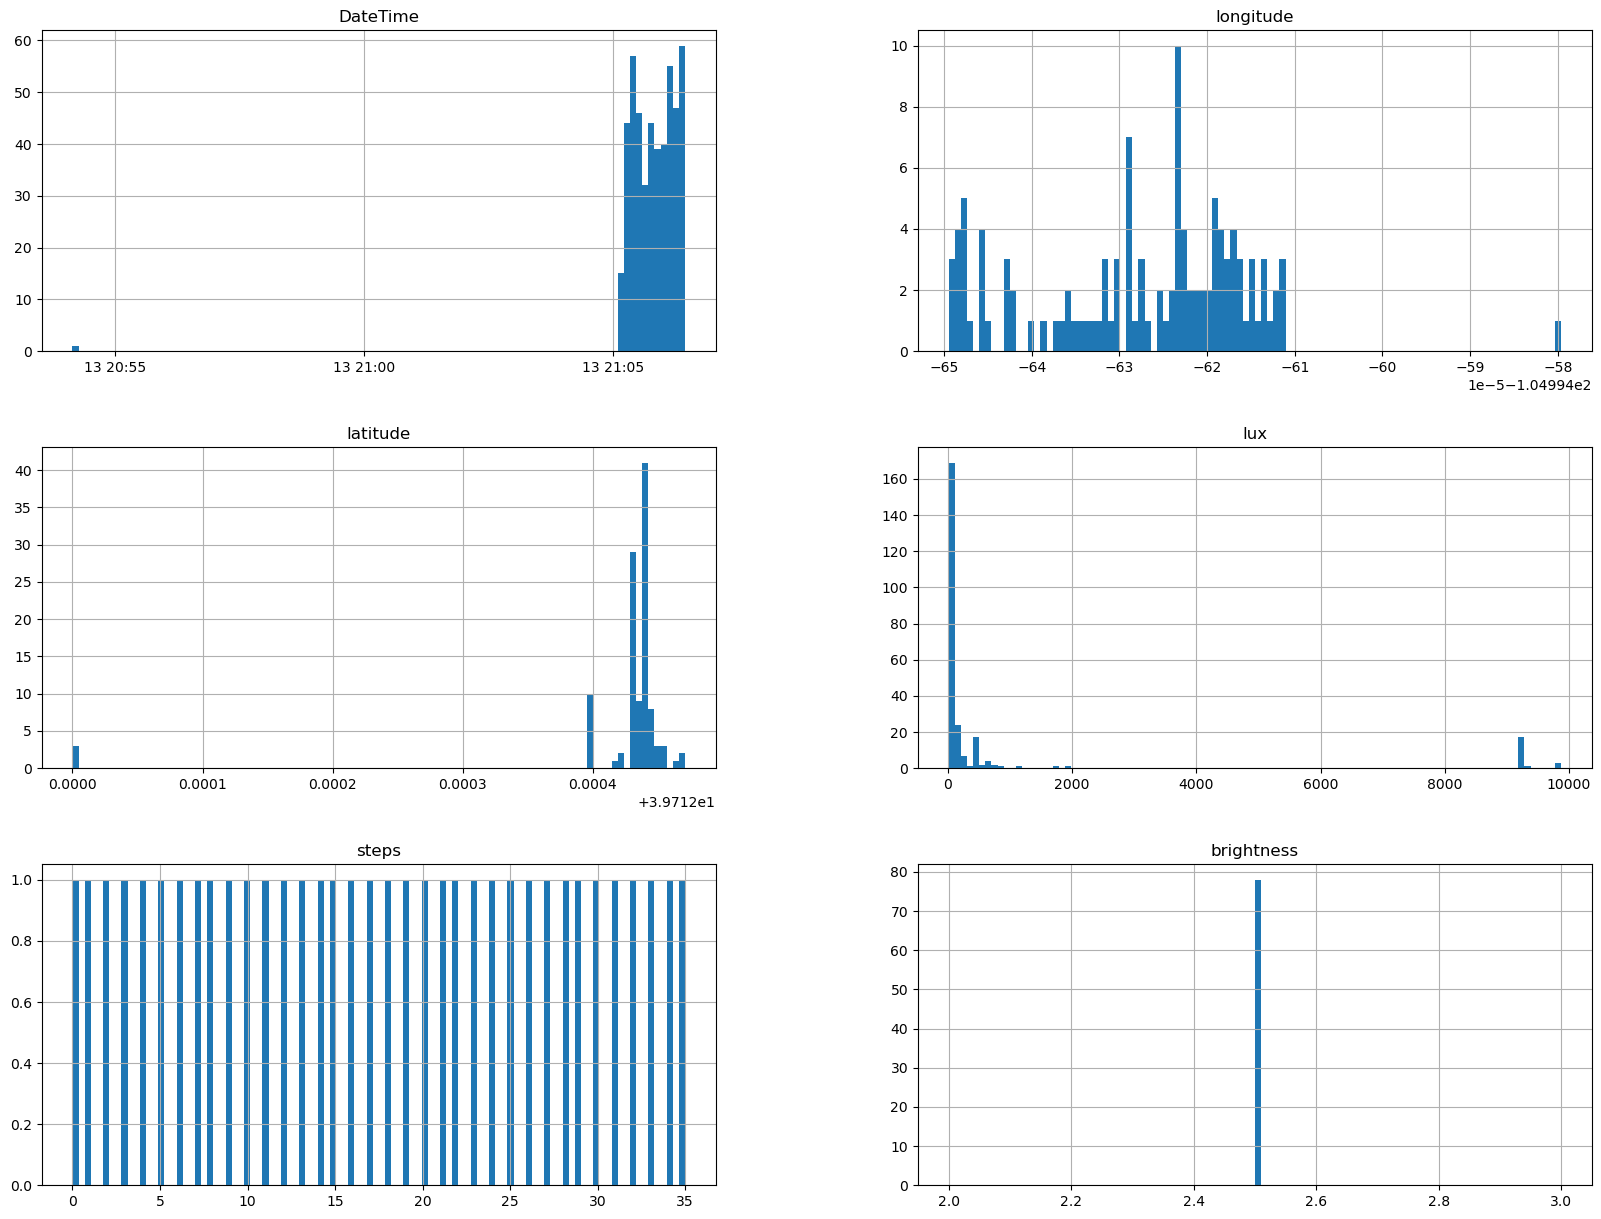

In [61]:
new_sensor_data.hist(bins=100,figsize=(20,15))

In [67]:
new_sensor_data.to_csv('new_sensor_data.csv')